<a href="https://colab.research.google.com/github/sarathy219/My-project/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chatbot: Hello! Type 'start' to begin pathfinding, 'sensor' to scan area, or 'exit' to quit.
You: start
Chatbot: Path found! Encrypting and drawing...
Encrypted path data: b'gAAAAABoJBV2_dqj3--JmU5htfNBgdD7a4B04Cz_3LKew3R71cO2Mv9MzGB7NT6zXIkRXwFhu-Edq-fOoLkHD878T-QO_rHCx05ijPiSsAYjK0K5SWZ2l0BqD5nXZxgpDDgOcqJm0FiiHGNjmXAPs8NWYog8_fjM1XQKqh9kq_ydZg6Q1LMB-udhk66hl12ebsEWhlPU7E-OejPi1P6dGx41wN5My7kPvIbZQdJmaEa13EiQAPym3zFUcjBk5V3MEya_nXROYKcC'
Decrypted path data: 0-1,0-2,0-3,0-4,0-5,0-6,1-6,1-7,1-8,1-9,1-10,1-11,1-12,2-12,3-12,4-12,5-12,6-12,7-12,8-12,8-13,8-14,9-14,10-14,11-14,12-14,13-14,14-14


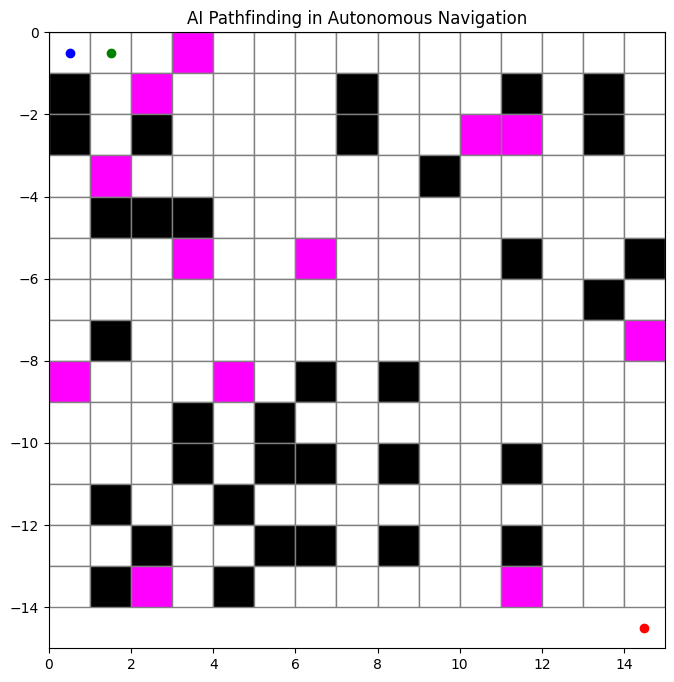

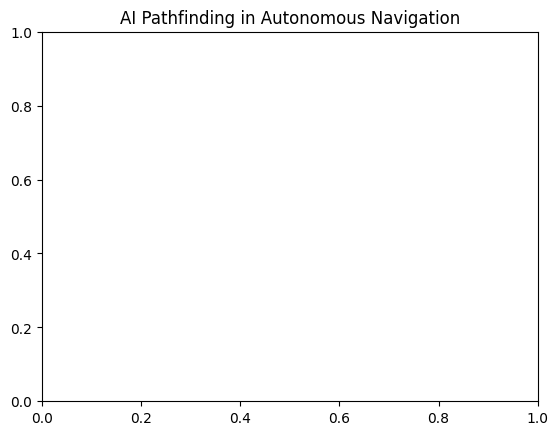

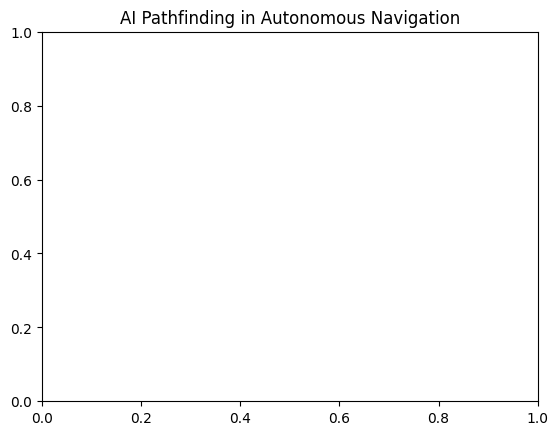

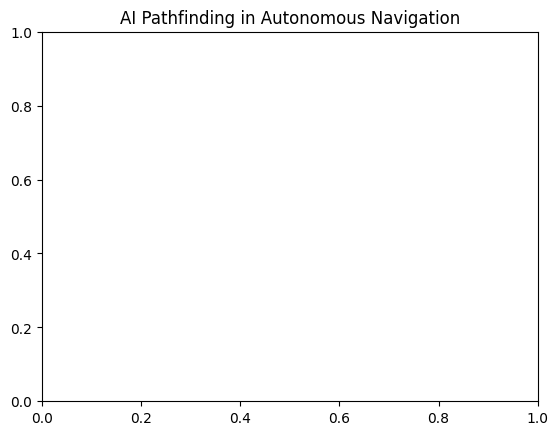

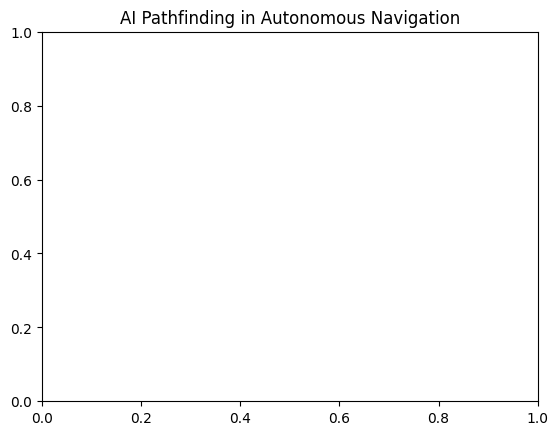

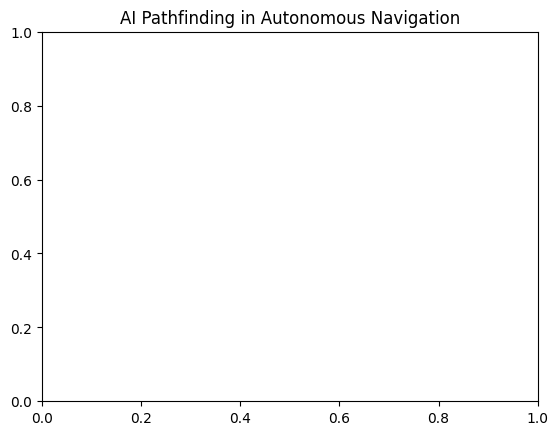

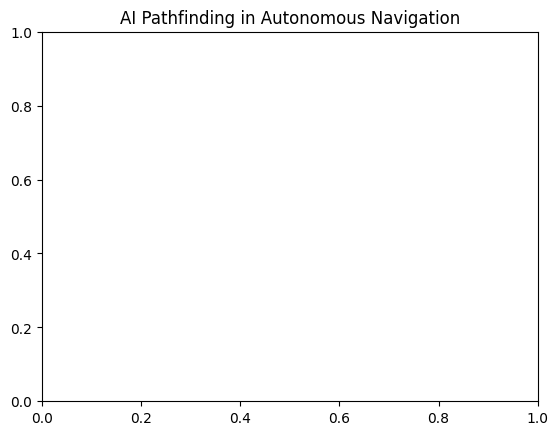

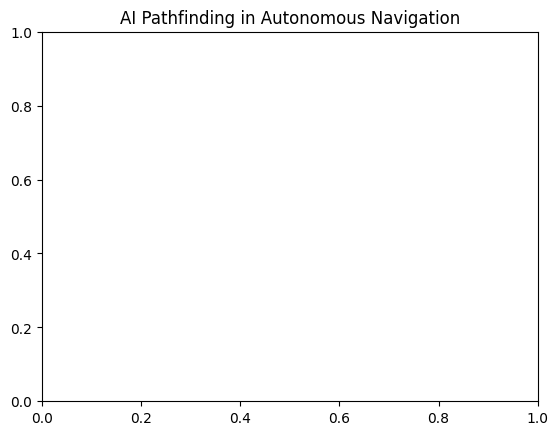

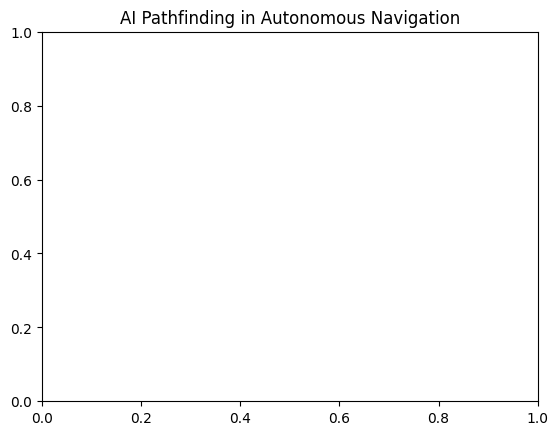

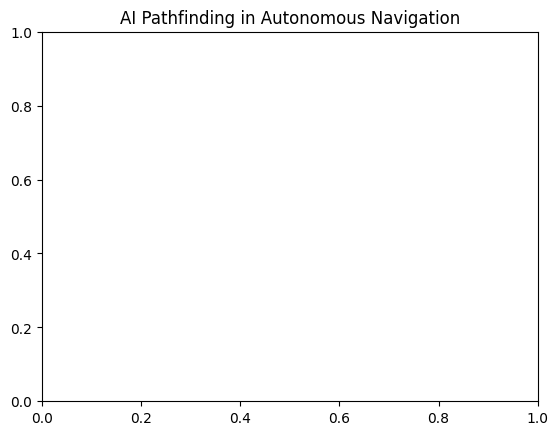

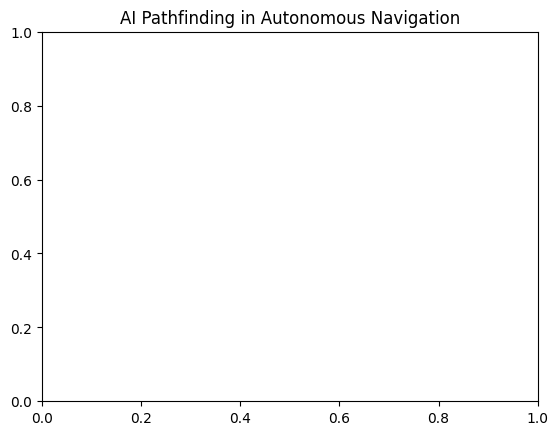

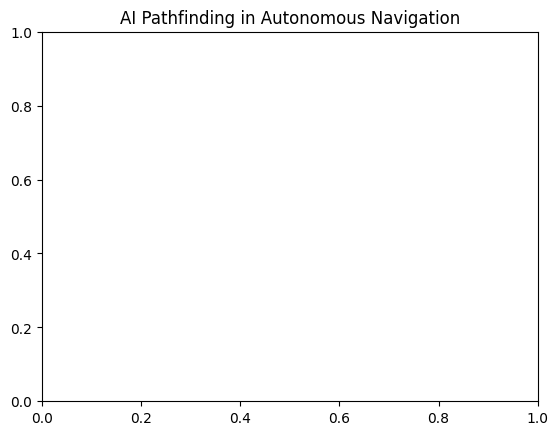

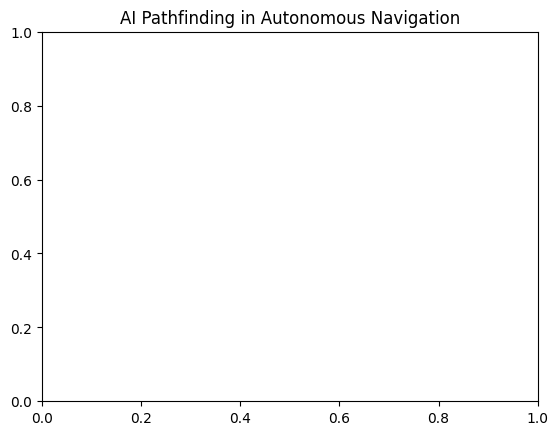

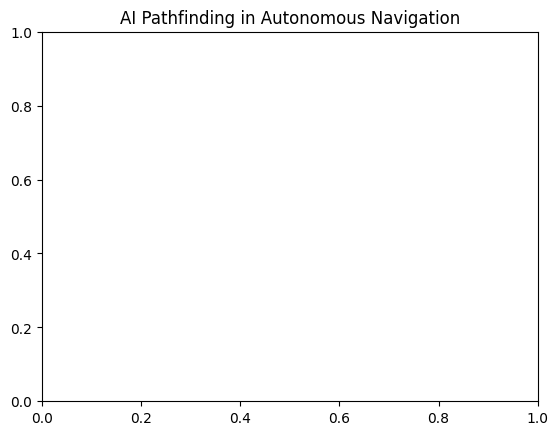

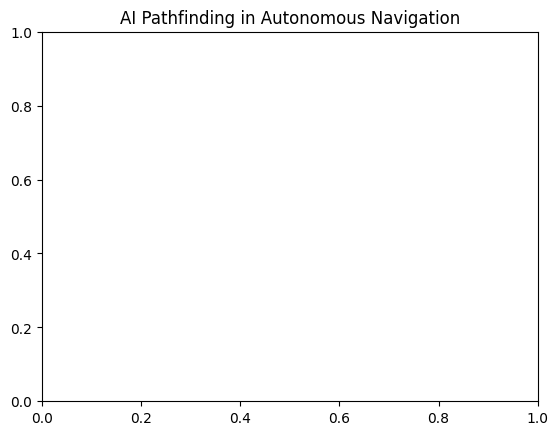

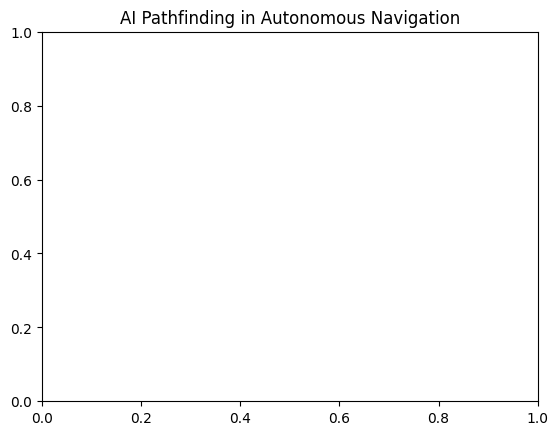

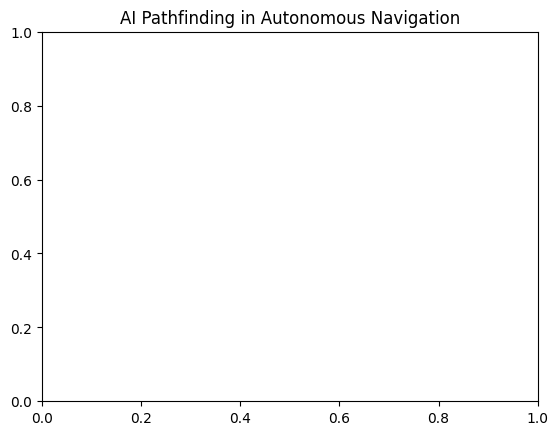

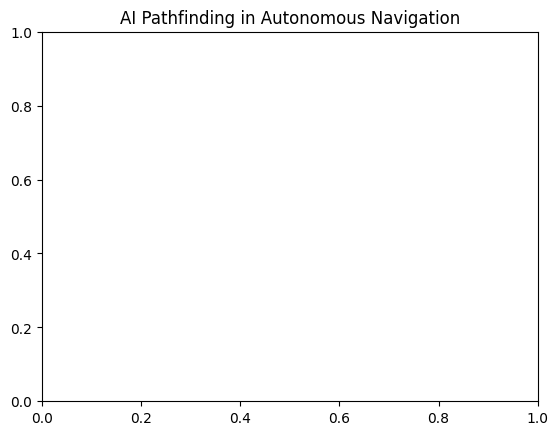

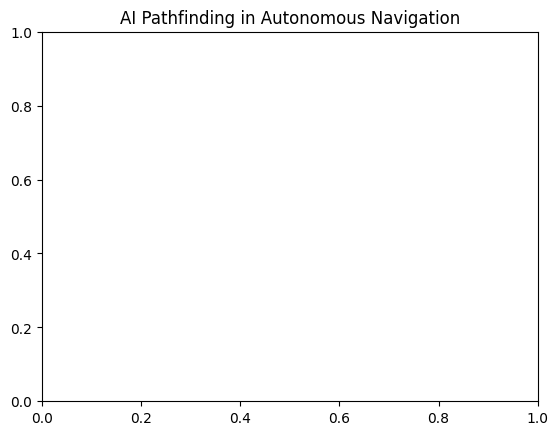

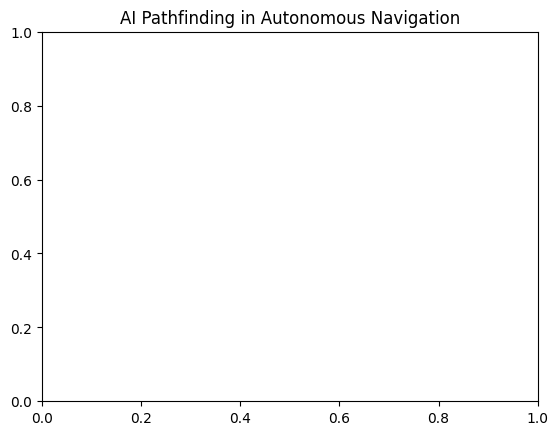

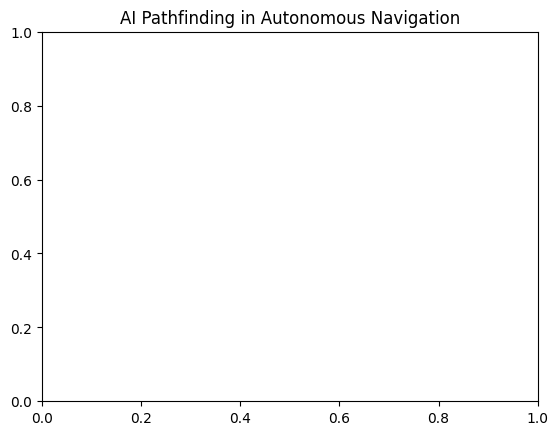

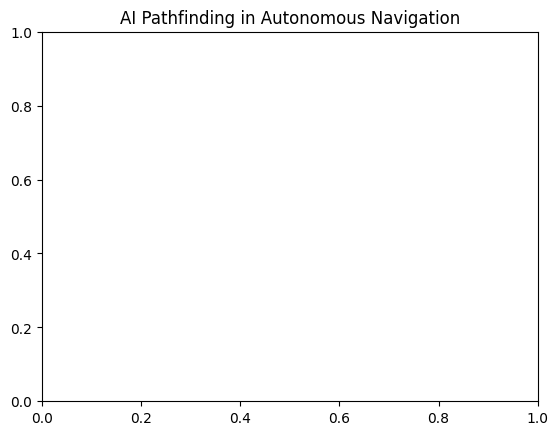

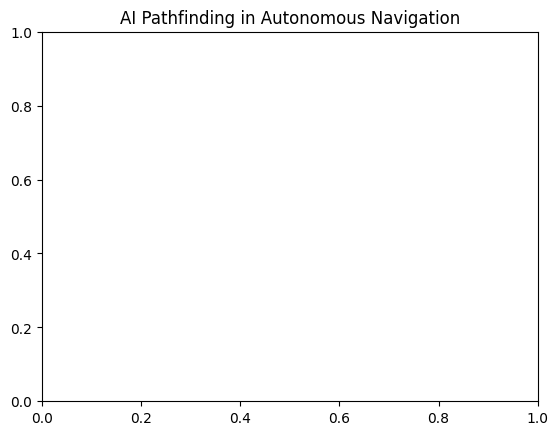

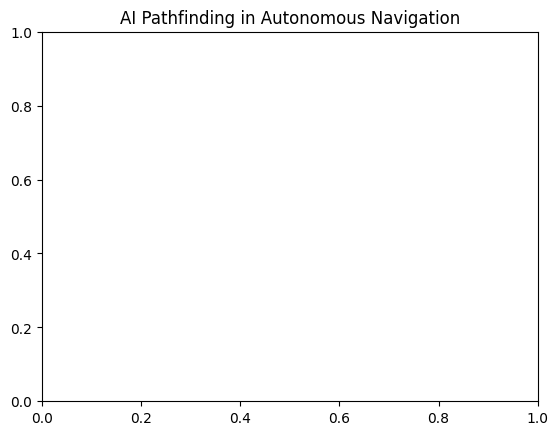

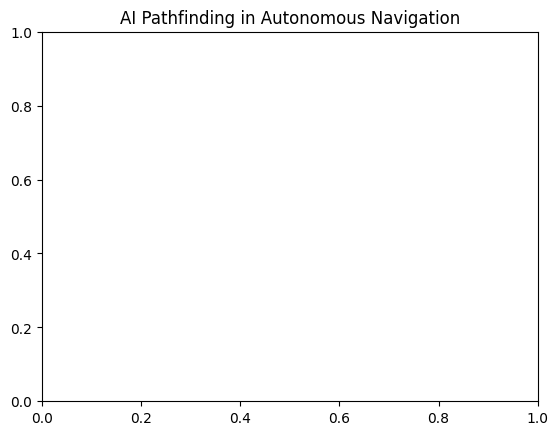

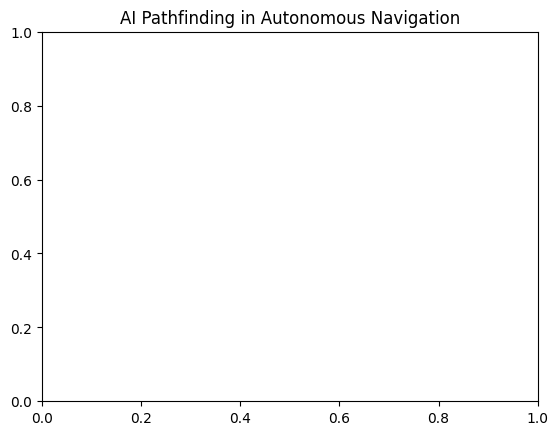

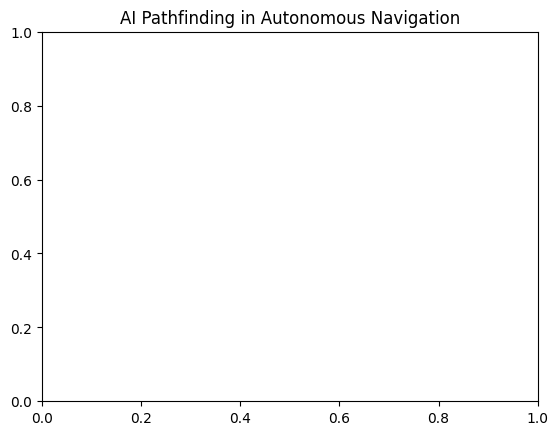

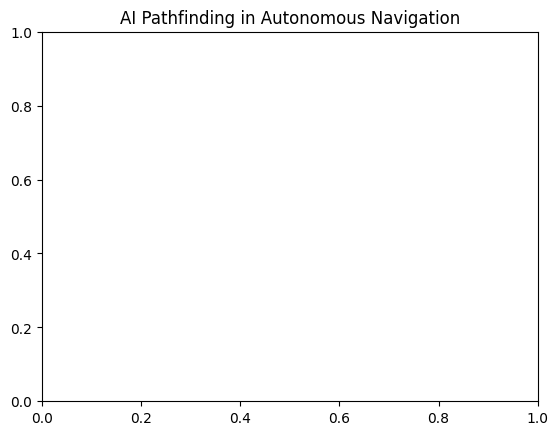

You: sensor
Sensor scanning at position (0, 0)...
You: exit
Chatbot: Goodbye!


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from queue import PriorityQueue
from cryptography.fernet import Fernet

# Define environment grid values
EMPTY, OBSTACLE, PEDESTRIAN, VEHICLE = 0, 1, 2, 3
colors = {EMPTY: "white", OBSTACLE: "black", PEDESTRIAN: "magenta", VEHICLE: "cyan"}

# Generate a grid environment
np.random.seed(10)
grid_size = (15, 15)
env = np.random.choice([EMPTY, OBSTACLE, PEDESTRIAN], size=grid_size, p=[0.75, 0.15, 0.1])
env[0, 0] = EMPTY
env[-1, -1] = EMPTY

def heuristic(a, b):
   return abs(a[0] - b[0]) + abs(a[1] - b[1])

def get_neighbors(pos, env):
   directions = [(-1,0),(1,0),(0,-1),(0,1)]
   neighbors = []
   for dr, dc in directions:
      r, c = pos[0] + dr, pos[1] + dc
      if 0 <= r < env.shape[0] and 0 <= c < env.shape[1] and env[r][c] != OBSTACLE:
        neighbors.append((r, c))
   return neighbors

def a_star(env, start, goal):
   open_set = PriorityQueue()
   open_set.put((0, start))
   came_from = {}
   g = {start: 0}
   f = {start: heuristic(start, goal)}

   while not open_set.empty():
      _, current = open_set.get()
      if current == goal:
         path = []
         while current in came_from:
            path.append(current)
            current = came_from[current]
         return path[::-1]
      for neighbor in get_neighbors(current, env):
         temp_g = g[current] + 1
         if neighbor not in g or temp_g < g[neighbor]:
           came_from[neighbor] = current
           g[neighbor] = temp_g
           f[neighbor] = temp_g + heuristic(neighbor, goal)
           open_set.put((f[neighbor], neighbor))
   return []

def draw_grid(env, path, start, goal):
   fig, ax = plt.subplots(figsize=(8, 8))
   for r in range(env.shape[0]):
      for c in range(env.shape[1]):
         ax.add_patch(plt.Rectangle((c, -r), 1, 1, facecolor=colors[env[r, c]], edgecolor='gray'))
   for r, c in path:
       ax.plot(c + 0.5, -r - 0.5, 'green', marker='o')
       ax.plot(start[1]+0.5, -start[0]-0.5, 'bo', label='Start')
       ax.plot(goal[1]+0.5, -goal[0]-0.5, 'ro', label='Goal')
       ax.set_xlim(0, env.shape[1])
       ax.set_ylim(-env.shape[0], 0)
       ax.set_aspect('equal')
       plt.title("AI Pathfinding in Autonomous Navigation")
       plt.show()

def simulate_sensor(current, env):
  print(f"Sensor scanning at position {current}...")
  r, c = current
  for i in range(r-1, r+2):
    for j in range(c-1, c+2):
       if 0 <= i < env.shape[0] and 0 <= j < env.shape[1]:
         cell = env[i][j]
         if cell == OBSTACLE:
           print(f"Obstacle at {(i, j)}")
         elif cell == PEDESTRIAN:
           print(f"Pedestrian at {(i, j)}")

def encrypt_path_data(path):
   key = Fernet.generate_key()
   fernet = Fernet(key)
   path_str = ','.join([f"{r}-{c}" for r, c in path])
   encrypted = fernet.encrypt(path_str.encode())
   print("Encrypted path data:", encrypted)
   decrypted = fernet.decrypt(encrypted).decode()
   print("Decrypted path data:", decrypted)
   return encrypted

# Chatbot simulation
def chatbot():
   print("Chatbot: Hello! Type 'start' to begin pathfinding, 'sensor' to scan area, or 'exit' to quit.")
   while True:
      cmd = input("You: ").lower()
      if cmd == "start":
          path = a_star(env, start, goal)
          if path:
             print("Chatbot: Path found! Encrypting and drawing...")
             encrypt_path_data(path)
             draw_grid(env, path, start, goal)
          else:
              print("Chatbot: No path found.")
      elif cmd == "sensor":
          simulate_sensor(start, env)
      elif cmd == "exit":
          print("Chatbot: Goodbye!")
          break
      else:
          print("Chatbot: Unknown command. Try 'start', 'sensor', or 'exit'.")

# Initialize start and goal
start = (0, 0)
goal = (grid_size[0]-1, grid_size[1]-1)

# Run chatbot interface
chatbot()